In [1]:
import pandas as pd

df_dluhy = pd.read_csv('~/data_dluhy.csv', delimiter=';')
df_dluhy = df_dluhy.set_index('shop_id')

df_doprava = pd.read_csv('~/data_doprava.csv', delimiter=';')
df_doprava = df_doprava.set_index('shop_id')

df_nabidky = pd.read_csv('~/data_nabidky.csv', delimiter=';')
df_nabidky = df_nabidky.set_index('shop_id')

df_recenze = pd.read_csv('~/data_recenze.csv', delimiter=';')
df_recenze = df_recenze.set_index('shop_id')


In [2]:
df_dluhy

,ma_dluh
shop_id,
1,0
2,1
3,1
4,1
5,0
...,...
2496,0
2497,0
2498,0


In [3]:
#mergovanie datafremov na zaklade shop_id
merged_df = df_doprava.merge(df_nabidky, on='shop_id', how='outer')
merged_df = merged_df.merge(df_dluhy, on='shop_id', how='outer')
merged_df = merged_df.merge(df_recenze, on='shop_id', how='outer')


print(merged_df)

         doprava  vydejni_mista  celkem_nabidek  nabidek_mimo_kategorie  \
shop_id                                                                   
1              0              0             130                      30   
2              0              0           17418                   10898   
3              0              0             645                     346   
4              0              0             808                     759   
5              1              0            2062                      29   
...          ...            ...             ...                     ...   
2496           0              1             119                       0   
2497           0              0             772                     248   
2498           0              1            1198                      35   
2499           0              0           10570                     268   
2500           0              1             410                     115   

         pocet_nabidek_b

In [4]:
#vytvorenie DF bez dlhu, tzn. value 0 u stplca ma dluh
df_bez_dluhu = merged_df[merged_df['ma_dluh'] == 0]


In [5]:
df_bez_dluhu

,doprava,vydejni_mista,celkem_nabidek,nabidek_mimo_kategorie,pocet_nabidek_bez_dostupnosti,ma_dluh,recenzi,odpovedi_na_recenze
shop_id,,,,,,,,
1,0,0,130,30,0,0,NaN,NaN
5,1,0,2062,29,0,0,NaN,NaN
7,0,0,37,37,0,0,1746.0,0.0
8,1,1,1266,39,1166,0,NaN,NaN
13,1,0,4793,340,349,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2496,0,1,119,0,19,0,NaN,NaN
2497,0,0,772,248,0,0,NaN,NaN
2498,0,1,1198,35,143,0,NaN,NaN


In [6]:
# vzfiltrovanie 1. kriteria, tzn. odpovedi na recenze 0  
criteria_1 = df_bez_dluhu[df_bez_dluhu['odpovedi_na_recenze'] == 0]

In [7]:
criteria_1

,doprava,vydejni_mista,celkem_nabidek,nabidek_mimo_kategorie,pocet_nabidek_bez_dostupnosti,ma_dluh,recenzi,odpovedi_na_recenze
shop_id,,,,,,,,
7,0,0,37,37,0,0,1746.0,0.0
58,0,0,6515,1652,165,0,1931.0,0.0
153,0,0,9436,3577,96,0,1542.0,0.0
198,0,0,7333,1033,290,0,2045.0,0.0
320,1,0,12114,10249,66,0,1802.0,0.0
338,1,1,18,15,0,0,839.0,0.0
511,0,0,1044,580,0,0,8712.0,0.0
657,0,0,2255,146,0,0,1568.0,0.0
1239,0,0,50162,14289,0,0,1804.0,0.0


In [8]:
criteria_1_shop_ids = criteria_1.index.tolist()

#output listu eshopov, kt. splnuju 1. kriterium
message = f"Tyhle eshopy: {criteria_1_shop_ids} nesplnuje 1. kriterium, protoze maji recenze ale 0 odpovedi na recenze."

print(message)


Tyhle eshopy: [7, 58, 153, 198, 320, 338, 511, 657, 1239, 1369, 1417, 1495, 1535, 1629, 1667, 1769, 1811, 1878, 2059, 2154, 2292] nesplnuje 1. kriterium, protoze maji recenze ale 0 odpovedi na recenze.


In [51]:
#filter 2. kriteria , doprava alebo vydejni mista s hodnotou 0
criteria_2 = df_bez_dluhu[(df_bez_dluhu['doprava'] == 0) | (df_bez_dluhu['vydejni_mista'] == 0)]

shop_ids_criteria_2 = criteria_2.index.tolist()

print(f"Tyhle eshopy nesplnuje 2. kriterium, protoze nemaji nastavenou dopravu nebo vydejni mista : {shop_ids_criteria_2} ")

Tyhle eshopy nesplnuje 2. kriterium, protoze nemaji nastavenou dopravu nebo vydejni mista : [1, 5, 7, 13, 18, 23, 24, 26, 30, 36, 38, 40, 41, 48, 58, 60, 74, 85, 97, 99, 106, 107, 108, 110, 112, 113, 118, 119, 122, 124, 126, 133, 135, 136, 140, 142, 145, 149, 151, 153, 154, 156, 158, 163, 170, 177, 184, 186, 192, 198, 209, 212, 214, 218, 220, 224, 226, 228, 231, 233, 244, 251, 260, 262, 265, 283, 284, 305, 306, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 332, 333, 343, 353, 354, 356, 361, 365, 374, 378, 381, 397, 404, 408, 409, 410, 411, 416, 417, 421, 423, 425, 427, 430, 442, 445, 448, 453, 459, 465, 466, 472, 473, 474, 476, 478, 480, 482, 484, 485, 486, 497, 498, 500, 506, 507, 510, 511, 515, 517, 518, 527, 529, 531, 533, 537, 540, 541, 545, 549, 554, 559, 560, 563, 565, 566, 568, 572, 575, 576, 578, 583, 588, 589, 595, 597, 600, 606, 611, 624, 629, 646, 647, 657, 658, 668, 675, 683, 684, 685, 692, 694, 706, 717, 718, 721, 732, 741, 746, 751, 764, 767, 777, 787, 793, 797, 

In [50]:
#filter 3. krteria, nabidky bez dostupni nad hodnotu 0
criteria_3 = df_bez_dluhu[df_bez_dluhu['pocet_nabidek_bez_dostupnosti'] > 0]

shop_ids_criterium_3 = criteria_3.index.tolist()

print(f"Shop IDs se zbozim bez dostupnosti: {shop_ids_criterium_3}")

Shop IDs se zbozim bez dostupnosti: [8, 13, 15, 21, 36, 38, 40, 41, 48, 51, 58, 74, 85, 97, 99, 106, 108, 110, 113, 118, 124, 126, 133, 134, 135, 136, 140, 142, 149, 151, 153, 156, 158, 163, 173, 174, 184, 186, 192, 198, 209, 212, 214, 218, 220, 226, 231, 233, 262, 283, 284, 305, 306, 312, 314, 315, 320, 321, 322, 323, 343, 353, 356, 365, 378, 381, 404, 408, 409, 416, 417, 423, 445, 459, 466, 472, 485, 497, 498, 500, 507, 515, 518, 527, 531, 541, 545, 549, 554, 559, 560, 583, 588, 589, 611, 624, 646, 647, 658, 675, 683, 685, 694, 706, 717, 718, 751, 777, 797, 807, 822, 842, 847, 909, 919, 920, 930, 932, 944, 950, 955, 970, 986, 996, 999, 1007, 1022, 1028, 1056, 1068, 1114, 1119, 1130, 1147, 1150, 1155, 1156, 1187, 1195, 1198, 1201, 1203, 1204, 1206, 1208, 1210, 1214, 1215, 1216, 1218, 1220, 1222, 1223, 1226, 1228, 1230, 1232, 1245, 1246, 1249, 1250, 1251, 1252, 1253, 1255, 1258, 1261, 1262, 1264, 1269, 1270, 1272, 1275, 1276, 1277, 1278, 1279, 1282, 1283, 1285, 1288, 1289, 1291, 1292, 

In [44]:
#funkcie na urcenie, kt. kriterium eshop nesplnuje
def urcit_nesplnena_kriteria(radek):
    nesplnena = []
    if radek['odpovedi_na_recenze'] == 0:
        nesplnena.append('Kriterium1')
    if radek['doprava'] == 0 or radek['vydejni_mista'] == 0:
        nesplnena.append('Kriterium2')
    if radek['pocet_nabidek_bez_dostupnosti'] > 0:
        nesplnena.append('Kriterium3')
    return ', '.join(nesplnena)

#vztvorenie kopie
df_temp = df_bez_dluhu.copy() # praca s kopiou miestou originalneho df
df_temp['Nesplnujuci kriterium'] = df_temp.apply(urcit_nesplnena_kriteria, axis=1)

#filter eshopov, kt. nesplnuju aspon 1 kriterium
nesplnujici_eshopy = df_temp[df_temp['Nesplnujuci kriterium'] != '']

#vyvorenie df so vsetkymi stplcami
finalni_dataframe = nesplnujici_eshopy
finalni_dataframe.index.name = 'shop_id'

print(finalni_dataframe)


         doprava  vydejni_mista  celkem_nabidek  nabidek_mimo_kategorie  \
shop_id                                                                   
1              0              0             130                      30   
5              1              0            2062                      29   
7              0              0              37                      37   
8              1              1            1266                      39   
13             1              0            4793                     340   
...          ...            ...             ...                     ...   
2496           0              1             119                       0   
2497           0              0             772                     248   
2498           0              1            1198                      35   
2499           0              0           10570                     268   
2500           0              1             410                     115   

         pocet_nabidek_b

In [48]:
#funckia pre urcenie, ktore konkretne kriterium neni splnene na zaklade outputu od uzivatela
def check_kriterium(shop_id, df):
    if shop_id in df.index:
        nesplnena_kriteria = df.loc[shop_id, 'Nesplnujuci kriterium']
        print(f"Eshop {shop_id} nesplňuje tato kritéria: {nesplnena_kriteria}")

        shop_data = df_bez_dluhu.loc[shop_id]
        if 'Kriterium1' in nesplnena_kriteria:
            print(f" Kriterium 1: Počet recenzí: {shop_data['recenzi']}, Počet odpovědí na recenze: {shop_data['odpovedi_na_recenze']}")
        if 'Kriterium2' in nesplnena_kriteria:
            print(f" Kriterium 2: Nastavená doprava: {shop_data['doprava']}, Nastavená výdejní místa: {shop_data['vydejni_mista']}")
        if 'Kriterium3' in nesplnena_kriteria:
            print(f" Kriterium 3: Počet nabídek bez dostupnosti: {shop_data['pocet_nabidek_bez_dostupnosti']}")
    else:
        print(f"Eshop s ID {shop_id} nebyl nalezen v datasetu, protoze ma dluh nebo nesplnuje ani jedno kriterium.")

#input dotaz
shop_id_input = input("Zadejte ID eshopu pro kontrolu: ")
try:
    shop_id = int(shop_id_input)
    check_kriterium(shop_id, finalni_dataframe)
except ValueError:
    print("Zadali jste neplatné ID eshopu. Zadejte prosím číslo.")


Zadejte ID eshopu pro kontrolu: 1
Eshop 1 nesplňuje tato kritéria: Kriterium2
 Kriterium 2: Nastavená doprava: 0.0, Nastavená výdejní místa: 0.0


In [49]:
#vyplotovanie celkobeho poctu kategorie nesplenych kriterii
import plotly.express as px

criteria_counts = finalni_dataframe['Nesplnujuci kriterium'].value_counts()

colors = {'Kriterium1': '#1f77b4',  
          'Kriterium2': '#ff7f0e',  
          'Kriterium3': '#2ca02c'}  


fig = px.bar(x=criteria_counts.index, y=criteria_counts.values, color=criteria_counts.index, color_discrete_map=colors,
             text=criteria_counts.values)

fig.update_layout(title='Počet eshopů, které nesplňují jednotlivá kritéria',
                  xaxis_title='Nesplněná kritéria',
                  yaxis_title='Počet eshopů',
                  legend_title='Kritéria',
                  showlegend=True)

fig.update_traces(textposition='outside')


fig.show()


In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#prepocet na percenta 
finalni_dataframe.loc[:, 'procento_mimo_kategorie'] = (finalni_dataframe['nabidek_mimo_kategorie'] / finalni_dataframe['celkem_nabidek']) * 100

# zoznam obchodov, kt. nesplnujuu kriteria
print("Dostupné ID obchodů:")
dostupne_id_obchodu = finalni_dataframe.index.tolist()
print(dostupne_id_obchodu)


vybrane_id_obchodu = int(input("Prosím, zadejte ID obchodu z výše uvedeného seznamu: ")) #uzivatelsky input

if vybrane_id_obchodu in dostupne_id_obchodu:
    data_vybraneho_obchodu = finalni_dataframe.loc[vybrane_id_obchodu]

    graf = go.Figure()

    graf.add_trace(go.Bar(x=['Celkové nabídky', 'Nabídky mimo kategorie'], 
                          y=[data_vybraneho_obchodu['celkem_nabidek'], data_vybraneho_obchodu['nabidek_mimo_kategorie']],
                          marker_color=['green', 'red'], text=[f"{data_vybraneho_obchodu['celkem_nabidek']}", f"{data_vybraneho_obchodu['procento_mimo_kategorie']:.2f}%"], textposition='auto'))

    graf.update_layout(title=f'Obchod ID {vybrane_id_obchodu}: Počty nabídek a procenta',
                       xaxis_title='Typy Nabídek',
                       yaxis_title='Počet Nabídek',
                       barmode='group')
    graf.show()

else:
    print("Zadané ID obchodu není v seznamu.")


/var/folders/6z/ncy_wsd14d118qw59ml4rfb00000gn/T/ipykernel_90033/3039274878.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dostupné ID obchodů:
[1, 5, 7, 8, 13, 15, 18, 21, 23, 24, 26, 30, 36, 38, 40, 41, 48, 51, 58, 60, 74, 85, 97, 99, 106, 107, 108, 110, 112, 113, 118, 119, 122, 124, 126, 133, 134, 135, 136, 140, 142, 145, 149, 151, 153, 154, 156, 158, 163, 170, 173, 174, 177, 184, 186, 192, 198, 209, 212, 214, 218, 220, 224, 226, 228, 231, 233, 244, 251, 260, 262, 265, 283, 284, 305, 306, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 332, 333, 338, 343, 353, 354, 356, 361, 365, 374, 378, 381, 397, 404, 408, 409, 410, 411, 416, 417, 421, 423, 425, 427, 430, 442, 445, 448, 453, 459, 465, 466, 472, 473, 474, 476, 478, 480, 482, 484, 485, 486, 497, 498, 500, 506, 507, 510, 511, 515, 517, 518, 527, 529, 531, 533, 537, 540, 541, 545, 549, 554, 559, 560, 563, 565, 566, 568, 572, 575, 576, 578, 583, 588, 589, 595, 597, 600, 606, 611, 624, 629, 646, 647, 657, 658, 668, 675, 683, 684, 685, 692, 694, 706, 717, 718, 721, 732, 741, 746, 751, 764, 767, 777, 787, 793, 797, 807, 822, 829, 842, 844, 847, 878, 9

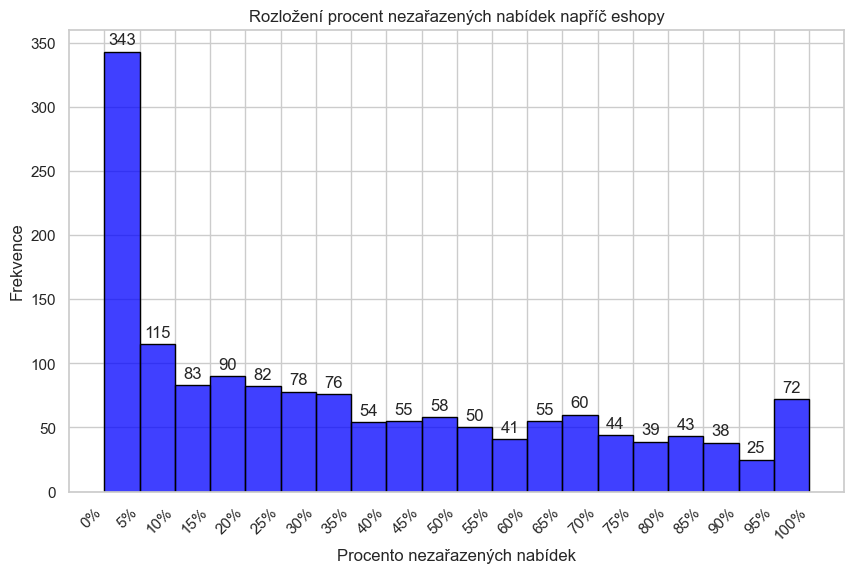

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df_bez_dluhu.loc[:, 'procento_nezarazenych'] = (df_bez_dluhu['nabidek_mimo_kategorie'] / df_bez_dluhu['celkem_nabidek']) * 100

sns.set(style='whitegrid')

#histogram zobrazujuci pocet obchodov v % distribucii
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_bez_dluhu['procento_nezarazenych'], bins=range(0, 101, 5), kde=False, color='blue', edgecolor='black')

plt.xlabel('Procento nezařazených nabídek')
plt.ylabel('Frekvence')
plt.title('Rozložení procent nezařazených nabídek napříč eshopy')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.xticks(range(0, 101, 5), [f'{x}%' for x in range(0, 101, 5)], rotation=45, ha='right')

plt.show()


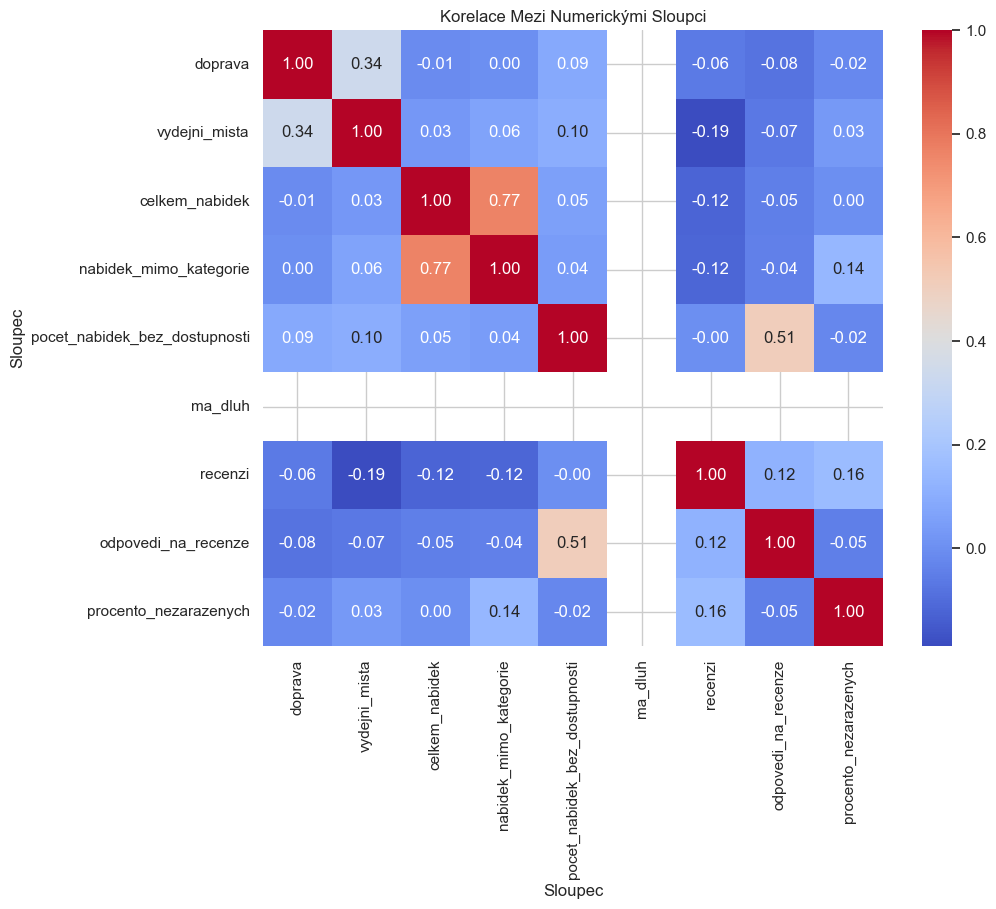

In [25]:
import seaborn as sns

#korelacni matice 
#extract jenom numericke stplce
numericke_sloupce = finalni_dataframe.select_dtypes(include='number')

korelacni_matice = numericke_sloupce.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(korelacni_matice, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelace mezi numerickými sloupci')
plt.xlabel('Sloupec')
plt.ylabel('Sloupec')

plt.show()


In [55]:
print(finalni_dataframe['procento_nezarazenych'])


shop_id
1        23.076923
5         1.406402
7       100.000000
8         3.080569
13        7.093678
           ...    
2496      0.000000
2497     32.124352
2498      2.921536
2499      2.535478
2500     28.048780
Name: procento_nezarazenych, Length: 1489, dtype: float64


Dostupné ID obchodů:
[1, 5, 7, 8, 13, 15, 18, 21, 23, 24, 26, 30, 36, 38, 40, 41, 48, 51, 58, 60, 74, 85, 97, 99, 106, 107, 108, 110, 112, 113, 118, 119, 122, 124, 126, 133, 134, 135, 136, 140, 142, 145, 149, 151, 153, 154, 156, 158, 163, 170, 173, 174, 177, 184, 186, 192, 198, 209, 212, 214, 218, 220, 224, 226, 228, 231, 233, 244, 251, 260, 262, 265, 283, 284, 305, 306, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 332, 333, 338, 343, 353, 354, 356, 361, 365, 374, 378, 381, 397, 404, 408, 409, 410, 411, 416, 417, 421, 423, 425, 427, 430, 442, 445, 448, 453, 459, 465, 466, 472, 473, 474, 476, 478, 480, 482, 484, 485, 486, 497, 498, 500, 506, 507, 510, 511, 515, 517, 518, 527, 529, 531, 533, 537, 540, 541, 545, 549, 554, 559, 560, 563, 565, 566, 568, 572, 575, 576, 578, 583, 588, 589, 595, 597, 600, 606, 611, 624, 629, 646, 647, 657, 658, 668, 675, 683, 684, 685, 692, 694, 706, 717, 718, 721, 732, 741, 746, 751, 764, 767, 777, 787, 793, 797, 807, 822, 829, 842, 844, 847, 878, 9

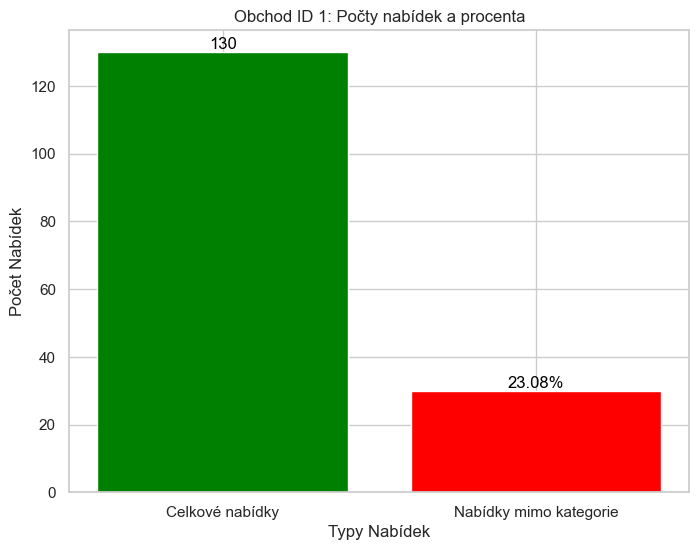

In [58]:
#alternativa k plotly knihovne


print("Dostupné ID obchodů:")
dostupne_id_obchodu = finalni_dataframe.index.tolist()
print(dostupne_id_obchodu)

vybrane_id_obchodu = int(input("Prosím, zadejte ID obchodu z výše uvedeného seznamu: "))

if vybrane_id_obchodu in dostupne_id_obchodu:
    data_vybraneho_obchodu = finalni_dataframe.loc[vybrane_id_obchodu]

    categories = ['Celkové nabídky', 'Nabídky mimo kategorie']
    values = [data_vybraneho_obchodu['celkem_nabidek'], data_vybraneho_obchodu['nabidek_mimo_kategorie']]
    colors = ['green', 'red']
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(categories, values, color=colors)

    plt.text(bars[0].get_x() + bars[0].get_width()/2, bars[0].get_height(), f'{values[0]}', 
             ha='center', va='bottom', color='black')

    percentage = data_vybraneho_obchodu['procento_mimo_kategorie']
    plt.text(bars[1].get_x() + bars[1].get_width()/2, bars[1].get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom', color='black')

    plt.title(f'Obchod ID {vybrane_id_obchodu}: Počty nabídek a procenta')
    plt.xlabel('Typy Nabídek')
    plt.ylabel('Počet Nabídek')

    plt.show()

else:
    print("Zadané ID obchodu není v seznamu.")
